### Parametrized quantum circuits

From [here](https://learn.qiskit.org/course/machine-learning/parameterized-quantum-circuits).

## Expressibility
In Reference 1, the authors propose the measures of _expressibility_ and _entangling capability_ to discriminate between different parameterized quantum circuits. We can think of the expressibility of a circuit as the extent to which it can generate states within the Hilbert space, while the entangling capability of a circuit describes its ability to generate entangled states.

The expressibility of a parameterized quantum circuit is essentially the coverage of the Hilbert space by the circuit's hypothesis space. Highly expressive parameterized quantum circuits can represent many different unitaries. There are many ways to represent this expressibility, one such example can be found in Reference 1. Here the authors quantify it by computing the extent to which the states generated from the circuit deviate from the uniform distribution
If the chance of producing any quantum state is equally probable, we say the states are uniformly distributed.

1. Sukin Sim, Peter D. Johnson and Alan Aspuru-Guzik, Expressibility and entangling capability of parameterized quantum circuits for hybrid quantum-classical algorithms, Advanced Quantum Technology 2 (2019) 1900070, [doi:10.1002/qute.201900070](doi:10.1002/qute.201900070), arXiv:1905.10876.

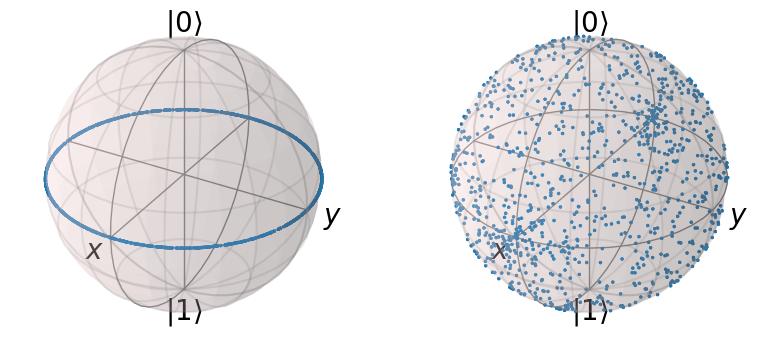

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import numpy as np
from qiskit.circuit import ParameterVector,Parameter,QuantumCircuit


# First, we need to define the circuits:
theta_param = Parameter('θ')
phi_param = Parameter('Φ')

# Circuit A
qc_A = QuantumCircuit(1)
qc_A.h(0)
qc_A.rz(theta_param, 0)

# Circuit B
qc_B = QuantumCircuit(1)
qc_B.h(0)
qc_B.rz(theta_param, 0)
qc_B.rx(phi_param, 0)

# Next we uniformly sample the parameter space for the two parameters theta and phi
np.random.seed(0)
num_param = 1000
theta = [2*np.pi*np.random.uniform() for i in range(num_param)]
phi = [2*np.pi*np.random.uniform() for i in range(num_param)]

# Then we take the parameter value lists, build the state vectors corresponding
# to each circuit, and plot them on the Bloch sphere:
from qiskit.visualization.bloch import Bloch
from qiskit.quantum_info import Statevector

def state_to_bloch(state_vec):
    # Converts state vectors to points on the Bloch sphere
    phi = np.angle(state_vec.data[1])-np.angle(state_vec.data[0])
    theta = 2*np.arccos(np.abs(state_vec.data[0]))
    return [np.sin(theta)*np.cos(phi),np.sin(theta)*np.sin(phi),np.cos(theta)]

# Bloch sphere plot formatting
width, height = plt.figaspect(1/2)
fig=plt.figure(figsize=(width, height))
ax1, ax2 = fig.add_subplot(1, 2, 1, projection='3d'), fig.add_subplot(1, 2, 2, projection='3d')
b1,b2 = Bloch(axes=ax1), Bloch(axes=ax2)
b1.point_color, b2.point_color = ['tab:blue'],['tab:blue']
b1.point_marker, b2.point_marker= ['o'],['o']
b1.point_size, b2.point_size=[2],[2]

# Calculate state vectors for circuit A and circuit B for each set of sampled parameters
# and add to their respective Bloch sphere
for i in range(num_param):    
    state_1=Statevector.from_instruction(qc_A.bind_parameters({theta_param:theta[i]}))
    state_2=Statevector.from_instruction(qc_B.bind_parameters({theta_param:theta[i], phi_param:phi[i]}))
    b1.add_points(state_to_bloch(state_1))
    b2.add_points(state_to_bloch(state_2))

b1.show()
b2.show()